In [3]:
!pip install kaggle

In [8]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# API to fetch the dataset from Kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:05<00:00, 33.2MB/s]
100% 163M/163M [00:05<00:00, 28.8MB/s]


In [10]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1402.jpg', 'with_mask_3586.jpg', 'with_mask_2980.jpg', 'with_mask_842.jpg', 'with_mask_598.jpg']
['with_mask_1406.jpg', 'with_mask_3105.jpg', 'with_mask_2408.jpg', 'with_mask_2839.jpg', 'with_mask_1731.jpg']


In [14]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1220.jpg', 'without_mask_2485.jpg', 'without_mask_66.jpg', 'without_mask_3077.jpg', 'without_mask_1951.jpg']
['without_mask_1799.jpg', 'without_mask_69.jpg', 'without_mask_1908.jpg', 'without_mask_624.jpg', 'without_mask_3655.jpg']


In [15]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating labels for the two class of Image**

with mask --> 1

without mask --> 0

In [16]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [17]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

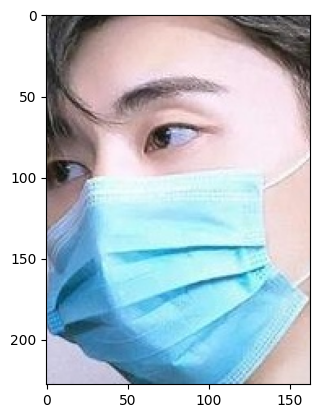

In [20]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

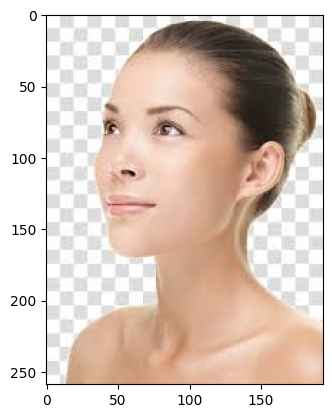

In [21]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images
2. Convert the images to numpy arrays

In [22]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data =[]

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
type(data)

list

In [24]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [251, 251, 251],
        [255, 255, 255],
        [253, 253, 253]],

       ...,

       [[254, 255, 251],
        [255, 255, 250],
        [255, 255, 250],
        ...,
        [245, 245, 253],
        [251, 252, 254],
        [249, 250, 249]],

       [[251, 255, 253],
        [253, 255, 253],
        [255, 255, 251],
        ...,
        [237, 235, 246],
        [242, 241, 249],
        [248, 247, 252]],

       [[252, 255, 255],
        [253, 255, 254],
        [255, 255, 252],
        ...,
        [240, 237, 247],
        [240, 238, 246],
        [243, 241, 249]]], dtype=uint8)
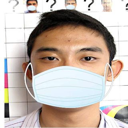

In [25]:
data[0]

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

In [28]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [29]:
type(X)

numpy.ndarray

In [30]:
type(Y)

numpy.ndarray

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [46]:
# scaling the data

X_train_scaled = X_train/225

X_test_scaled = X_test/225

array([[[195, 204, 205],
        [188, 199, 199],
        [186, 200, 200],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]],

       [[196, 205, 205],
        [189, 199, 200],
        [188, 200, 201],
        ...,
        [223, 223, 223],
        [224, 224, 224],
        [224, 224, 224]],

       [[198, 206, 205],
        [191, 200, 200],
        [190, 200, 202],
        ...,
        [222, 222, 222],
        [223, 223, 223],
        [223, 223, 223]],

       ...,

       [[ 21,  19,  22],
        [ 23,  21,  24],
        [ 26,  24,  27],
        ...,
        [ 11,  11,  14],
        [ 11,  11,  13],
        [  8,   8,  10]],

       [[ 19,  17,  20],
        [ 21,  19,  22],
        [ 24,  22,  25],
        ...,
        [ 13,  13,  17],
        [ 11,  11,  12],
        [  8,   8,  10]],

       [[ 18,  16,  19],
        [ 20,  18,  21],
        [ 22,  20,  23],
        ...,
        [ 12,  11,  15],
        [ 11,  11,  13],
        [  8,   8,  10]]], dtype=uint8)
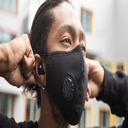

In [47]:
X_train[0]

In [48]:
X_train_scaled[0]

array([[[0.86666667, 0.90666667, 0.91111111],
        [0.83555556, 0.88444444, 0.88444444],
        [0.82666667, 0.88888889, 0.88888889],
        ...,
        [0.99555556, 0.99555556, 0.99555556],
        [0.99555556, 0.99555556, 0.99555556],
        [0.99555556, 0.99555556, 0.99555556]],

       [[0.87111111, 0.91111111, 0.91111111],
        [0.84      , 0.88444444, 0.88888889],
        [0.83555556, 0.88888889, 0.89333333],
        ...,
        [0.99111111, 0.99111111, 0.99111111],
        [0.99555556, 0.99555556, 0.99555556],
        [0.99555556, 0.99555556, 0.99555556]],

       [[0.88      , 0.91555556, 0.91111111],
        [0.84888889, 0.88888889, 0.88888889],
        [0.84444444, 0.88888889, 0.89777778],
        ...,
        [0.98666667, 0.98666667, 0.98666667],
        [0.99111111, 0.99111111, 0.99111111],
        [0.99111111, 0.99111111, 0.99111111]],

       ...,

       [[0.09333333, 0.08444444, 0.09777778],
        [0.10222222, 0.09333333, 0.10666667],
        [0.11555556, 0

**Building a Convolutional Neural Network(CNN)**

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [51]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
# training the neural network
history = model.fit(X_train_scaled,Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 158s 911ms/step - loss: 0.4924 - acc: 0.7734 - val_loss: 0.3035 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 152s 892ms/step - loss: 0.2953 - acc: 0.8786 - val_loss: 0.2540 - val_acc: 0.8876
Epoch 3/5
170/170 [==============================] - 151s 887ms/step - loss: 0.2394 - acc: 0.9071 - val_loss: 0.2065 - val_acc: 0.9174
Epoch 4/5
170/170 [==============================] - 152s 894ms/step - loss: 0.2092 - acc: 0.9178 - val_loss: 0.1997 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 152s 893ms/step - loss: 0.1643 - acc: 0.9365 - val_loss: 0.2010 - val_acc: 0.9306


**Model Evaluation**

In [54]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accurcy =', accuracy)

48/48 [==============================] - 11s 228ms/step - loss: 0.6901 - acc: 0.4937
Test Accurcy = 0.49371278285980225


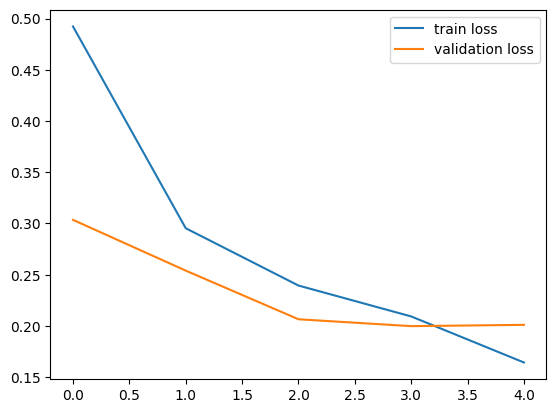

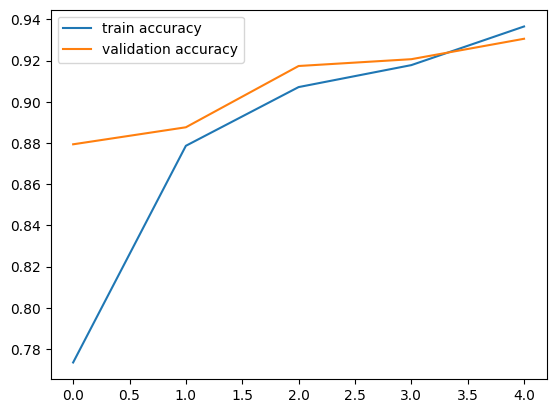

In [55]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()



**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/225

input_image_reshaped = np.reshaped(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')